# Linear regression code along

Dataset from ISLR - Introduction to Statistical Learning with R

- TV, Radio, Newspaper spending in k$
- Sales in k units 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
df.columns[:-1]

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

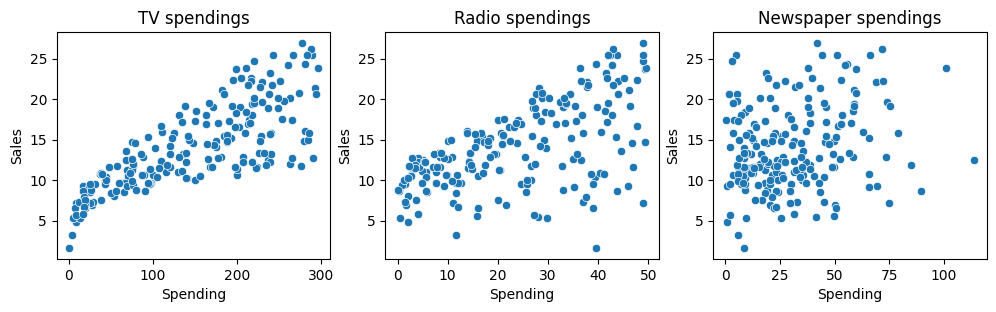

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y = "Sales", ax = ax[i])
    ax[i].set(xlabel = "Spending", title = f"{feature} spendings")


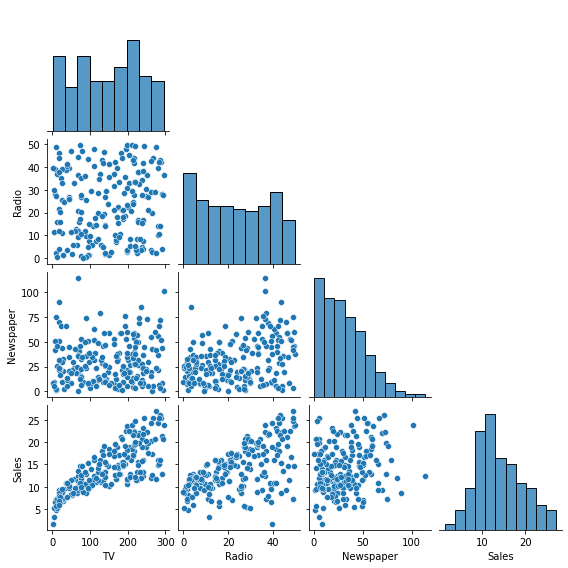

In [16]:
sns.pairplot(df, corner = True, height = 2)

## Simple linear regression

$$y \approx \beta_0 + \beta_1 x$$

Intercept 7.033
Slope 0.048


<AxesSubplot:xlabel='TV', ylabel='Sales'>

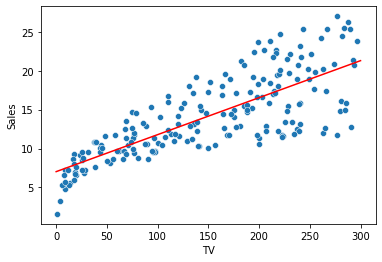

In [26]:
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)
print(f"Intercept {beta_0:.3f}")
print(f"Slope {beta_1:.3f}")

def y_hat(x): return beta_0 + beta_1*x

spend = np.linspace(0,300)

sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spend, y = y_hat(spend), color="red")

<AxesSubplot:xlabel='TV', ylabel='Sales'>

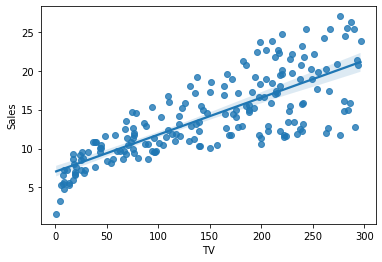

In [27]:
sns.regplot(x = X, y = y)

## Multiple linear regression

In [40]:
X, y = df.drop("Sales", axis = "columns"), df["Sales"]
X.insert(0, "Intercept", 1)

# OLS normal equation/closed form equation
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X, y)
print(beta_hat)

predict = lambda x, beta: np.dot(x, beta)

# data leakage
# don't do this in reality, here we test for sanity
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"Predicted value for this sample {y_hat:.2f}")
print(f"True value for this sample {y.iloc[0]}")


0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
Predicted value for this sample 20.52
True value for this sample 22.1


## Train|test split

In [62]:
# split 70 % training, 30 % test
train_fraction = int(len(df)*.7)
print(f"{train_fraction} samples for training data")
print(f"{len(df)-train_fraction} samples for test data")

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

print(f"{train.index.isin(test.index).sum()} data from test in training")

X_train, y_train = train.drop("Sales", axis = 1), train["Sales"]
X_test, y_test = test.drop("Sales", axis = 1), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

140 samples for training data
60 samples for test data
0 data from test in training


## Prediction

In [78]:
# this uses OLS normal equation
beta_hat = regression_fit(X_train, y_train)
predict = lambda X, weights: X @ weights

# X_test 
y_hat = predict(X_test.to_numpy(), beta_hat.to_numpy().reshape(4,1))
y_hat[:5], y_test[:5]

(array([[12.17324122],
        [12.19125728],
        [ 3.74653773],
        [ 8.90545078],
        [18.43980126]]),
 2     10.4
 8     13.2
 9      4.8
 14     9.7
 15    19.0
 Name: Sales, dtype: float64)

## Evaluation 

- MAE - Mean absolute error (easy to interpret)
- MSE - Mean square error (square of original unit, punishes outliers more than MAE, somewhat hard to interpret)
- RMSE - Root mean square error (original unit, punishes outliers more than MAE, easy to interpret)

In [84]:
m = len(y_test)
y_hat = np.reshape(y_hat, m)

MAE = 1/m * np.sum(np.abs(y_test-y_hat))
MSE = 1/m * np.sum((y_test-y_hat)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(1.3244490959726545, 3.540425618238493, 1.8816018755939028)